<a href="https://colab.research.google.com/github/OmdenaAI/Katapult/blob/main/task-5-exploratory-data-analysis-and-visualization/notebook/EDA_PakistanStartups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Pakistani Funded Startup Data dataset from Kaggle](https://www.kaggle.com/hasnainajmal281/pakistani-funded-startup-data)

**Testing Google colab with GitHub**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [ ]:
startups = pd.read_excel('FundedStartupsPakistan.xlsx', sheet_name = 0)
investors = pd.read_excel('FundedStartupsPakistan.xlsx', sheet_name = 2)

In [ ]:
startups.shape

(113, 36)

In [ ]:
startups.sample(5)

,Startup name,Active (opinion by CMs),Last edited by,Location,HQ,Founded date,Industry (Vertical),Horizontal,Operating status,Funding status,Employees,Founder 1,Founder 2,Founder 3,Founder 4,Founder 5,Unnamed: 16,Website,Social media URLs,Email,Phone,Funding round 1 (Investment),Founder round 1 investors,Funding round 1 date,Funding round 2 (Investment),Founder round 2 investors,Funding round 2 date,Funding round 3 (Investment),Founder round 3 investors,Funding round 3 date,Funding round 4 (Investment),Founder round 4 investors,Funding round 4 date,Funding round 5 (Investment),Founder round 5 investors,Funding round 5 date
26,Bazaar Technologies,NaN,-,"Karachi, Sindh, Pakistan",Asia-Pacific (APAC),2020-01-05 00:00:00,Retail,"B2B,E-commerce",Active,Pre-seed,11 to 50,Hamza Jawaid,Saad Jangda,-,-,-,NaN,www.bazaar-tech.com,https://www.linkedin.com/company/bazaartechnol...,hello@bazaar-tech.com,NaN,1300000,"Indus Valley Capital, Alter Global",2020-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,FindMyAdventure,Y,-,"Karachi, Sindh, Pakistan",Asia-Pacific,2016-08-01 00:00:00,Adventure Travel,E- commerce,Active,Seed,11 to 50,Muhammad Komail Abbas,-,-,-,-,NaN,http://www.findmyadventure.pk/,https://www.facebook.com/findmyadventure,team@findmyadventure.pk,0333-0596362,-,NaN,2019-03-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,AzaadHealth,NaN,-,"Karachi, Sindh, Pakistan",Asia-Pacific,2016-08-01 00:00:00,Medical,Big Data,Active,Seed,1 to 10,Inam Haq,Rehan uddin,Syed Abrar,-,-,NaN,https://www.azaadhealth.com/,https://www.facebook.com/AzaadHealth,abrar@azaadhealth.com,0345-2209627,NaN,NaN,2018-03-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,PriceMatch,NaN,-,"Lahore, Pakistan",APAC,2012,Retail,Ecommerce,Active,Seed,NaN,NaN,NaN,NaN,-,-,NaN,http://pricematch.pk/,"https://twitter.com/pricematchpk, https://www....",NaN,NaN,€90K,NaN,13-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Sastaticket.pk,Y,-,"Karachi, Sindh, Pakistan",Asia-Pacific,2016-01-01 00:00:00,Travel Agency,E- commerce,Active,Early Stage Venture,11 to 50,Bilal Mekhri,Shazil Mekhri,-,-,-,NaN,https://www.sastaticket.pk/,https://www.facebook.com/sastaticket.pk,https://twitter.com/sastaticketpk,021-111 172 782,1500000,Gobi Partners,2018-11-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
startups.duplicated().sum()

0

In [ ]:
percent_missing = startups.isnull().sum() * 100 / len(startups)
missing_startups_df = pd.DataFrame({'column_name': startups.columns,
                                 'percent_missing': percent_missing})
missing_startups_df

,column_name,percent_missing
Startup name,Startup name,0.000000
Active (opinion by CMs),Active (opinion by CMs),62.831858
Last edited by,Last edited by,2.654867
Location,Location,7.079646
HQ,HQ,7.079646
Founded date,Founded date,8.849558
Industry (Vertical),Industry (Vertical),10.619469
Horizontal,Horizontal,26.548673
Operating status,Operating status,7.079646
Funding status,Funding status,7.079646


In [ ]:
startups = startups.rename(columns={'Startup name': 'Startup'})

In [ ]:
startups['Startup'] = startups['Startup'].apply(lambda x: x.lower())

In [ ]:
investors.shape

(143, 8)

In [ ]:
investors.sample(5)

,Investor/VC Fund,Startup,Industry,Horizontal,Total Round Amount,Lead Investor (Yes/No),Funding Round,Date
119,Suhail Tirmizi,Tier3 Pakistan,Information Technology,Security,NaN,NaN,Seed,2016-05-08
127,Vostok Emerging Finance,Finja,Banking,Fintech,3000000,YES,Convertible Note,2019-11-11
142,NaN,Touch'd,Information Technology,App,80000,NaN,Seed,2013-11-01
3,To be mentioned,Fotisto,Information Technology,Marketing/CRM,15000,NaN,Pre-Seed,2019-02-01
90,Pre Seed Round - Entertainer Asia - Vouch365,Entertainer Asia - Vouch365,Beauty fitness,NaN,500000,No,Seed,2016-02-10


In [ ]:
investors.duplicated().sum()

0

In [ ]:
percent_missing = investors.isnull().sum() * 100 / len(investors)
missing_investors_df = pd.DataFrame({'column_name': investors.columns,
                                 'percent_missing': percent_missing})
missing_investors_df

,column_name,percent_missing
Investor/VC Fund,Investor/VC Fund,4.895105
Startup,Startup,0.699301
Industry,Industry,0.699301
Horizontal,Horizontal,23.076923
Total Round Amount,Total Round Amount,9.090909
Lead Investor (Yes/No),Lead Investor (Yes/No),26.573427
Funding Round,Funding Round,2.797203
Date,Date,2.797203


In [ ]:
investors['Startup'] = investors['Startup'].apply(lambda x: str(x).lower())

In [ ]:
companies = pd.merge(startups, investors, on= 'Startup', how ='inner')
companies.head()

,Startup,Active (opinion by CMs),Last edited by,Location,HQ,Founded date,Industry (Vertical),Horizontal_x,Operating status,Funding status,Employees,Founder 1,Founder 2,Founder 3,Founder 4,Founder 5,Unnamed: 16,Website,Social media URLs,Email,Phone,Funding round 1 (Investment),Founder round 1 investors,Funding round 1 date,Funding round 2 (Investment),Founder round 2 investors,Funding round 2 date,Funding round 3 (Investment),Founder round 3 investors,Funding round 3 date,Funding round 4 (Investment),Founder round 4 investors,Funding round 4 date,Funding round 5 (Investment),Founder round 5 investors,Funding round 5 date,Investor/VC Fund,Industry,Horizontal_y,Total Round Amount,Lead Investor (Yes/No),Funding Round,Date
0,propakistani,Y,-,Islamabad,Asia-Pacific,2008-05-05 00:00:00,"Digital Media, Information Technology",-,Active,Early Stage Venture,1 to10,Aamir Attaa,-,-,-,-,NaN,https://propakistani.pk/,"https://twitter.com/ProPakistaniPK,https://www...",aamir@propakistani.com,-,Undisclosed,"Eikon 7,The Interactive Group,Umayr Abbasi, Us...",2019-07-26 00:00:00,-,-,-,-,-,-,-,-,-,-,-,-,Eikon7,Information Technology,News/Media,NaN,YES,Series A,2019-07-26
1,dealsmash,NaN,-,Islamabad,Asia-Pacific,2016-04-15 00:00:00,"Retail, Artificial Intelligence","Analytics, ,Artificial Intelligence",Active,Seed,1 to 10,Ahsan Vaqar Hundal,Ali Hasnain,Hamza Iftikhar,-,-,NaN,http://www.dealsmash.co/,"https://www.linkedin.com/company/dealsmash,htt...",info@dealsmash.co,#ERROR!,PKR 8.8M,National ICT R&D Fund,2017-05-15 00:00:00,150000,Al-Hilal Securties Advisors,2018-02-27 00:00:00,-,-,-,-,-,-,-,-,-,Al Hilal Securities Advisors,Retail,Lifestyle,234000,Yes,Seed,2016-04-15
2,dealsmash,NaN,-,Islamabad,Asia-Pacific,2016-04-15 00:00:00,"Retail, Artificial Intelligence","Analytics, ,Artificial Intelligence",Active,Seed,1 to 10,Ahsan Vaqar Hundal,Ali Hasnain,Hamza Iftikhar,-,-,NaN,http://www.dealsmash.co/,"https://www.linkedin.com/company/dealsmash,htt...",info@dealsmash.co,#ERROR!,PKR 8.8M,National ICT R&D Fund,2017-05-15 00:00:00,150000,Al-Hilal Securties Advisors,2018-02-27 00:00:00,-,-,-,-,-,-,-,-,-,Al Hilal Securities Advisors,Retail,Lifestyle,PKR8800000,YES,Seed,2017-05-15
3,dealsmash,NaN,-,Islamabad,Asia-Pacific,2016-04-15 00:00:00,"Retail, Artificial Intelligence","Analytics, ,Artificial Intelligence",Active,Seed,1 to 10,Ahsan Vaqar Hundal,Ali Hasnain,Hamza Iftikhar,-,-,NaN,http://www.dealsmash.co/,"https://www.linkedin.com/company/dealsmash,htt...",info@dealsmash.co,#ERROR!,PKR 8.8M,National ICT R&D Fund,2017-05-15 00:00:00,150000,Al-Hilal Securties Advisors,2018-02-27 00:00:00,-,-,-,-,-,-,-,-,-,National ICT R&D Fund,Retail,Lifestyle,234000,Yes,Seed,2016-04-15
4,dealsmash,NaN,-,Islamabad,Asia-Pacific,2016-04-15 00:00:00,"Retail, Artificial Intelligence","Analytics, ,Artificial Intelligence",Active,Seed,1 to 10,Ahsan Vaqar Hundal,Ali Hasnain,Hamza Iftikhar,-,-,NaN,http://www.dealsmash.co/,"https://www.linkedin.com/company/dealsmash,htt...",info@dealsmash.co,#ERROR!,PKR 8.8M,National ICT R&D Fund,2017-05-15 00:00:00,150000,Al-Hilal Securties Advisors,2018-02-27 00:00:00,-,-,-,-,-,-,-,-,-,National ICT R&D Fund,Retail,Lifestyle,150000,NaN,Seed,2018-02-27


In [ ]:
companies.shape

(123, 43)

In [ ]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Startup                       123 non-null    object        
 1   Active (opinion by CMs)       65 non-null     object        
 2   Last edited by                117 non-null    object        
 3   Location                      123 non-null    object        
 4   HQ                            123 non-null    object        
 5   Founded date                  122 non-null    object        
 6   Industry (Vertical)           120 non-null    object        
 7   Horizontal_x                  116 non-null    object        
 8   Operating status              123 non-null    object        
 9   Funding status                123 non-null    object        
 10  Employees                     117 non-null    object        
 11  Founder 1                     11

## Features Engineering

### Founded date

In [ ]:
companies["Founded date"].sample(5)

39                   2014
37                   2019
32    2017-09-01 00:00:00
28                   2017
13    2016-03-10 00:00:00
Name: Founded date, dtype: object

In [ ]:
def fillYear(mydate):
  mydate = str(mydate)
  if mydate == 'nan' or mydate == '-':
    return '2018' # Mode value
  units = mydate.split('-')
  if len(units[0]) == 4: # For the dates with the format '%Y-%m-%d &H:&M:S'
    return units[0]
  elif len(units) == 3: # For the dates with the format 'dd-mm-yy'
    return '20' + units[2]
  return mydate

companies["Founded Year"] = companies["Founded date"].apply(lambda x: fillYear(x))

In [ ]:
companies["Founded Year"].unique()

array(['2008', '2016', '2017', '2015', '2012', '2014', '2018', '2011',
       '2019', '2020', '2010', '2013'], dtype=object)

In [ ]:
companies["Founded Year"].mode()

0    2018
dtype: object

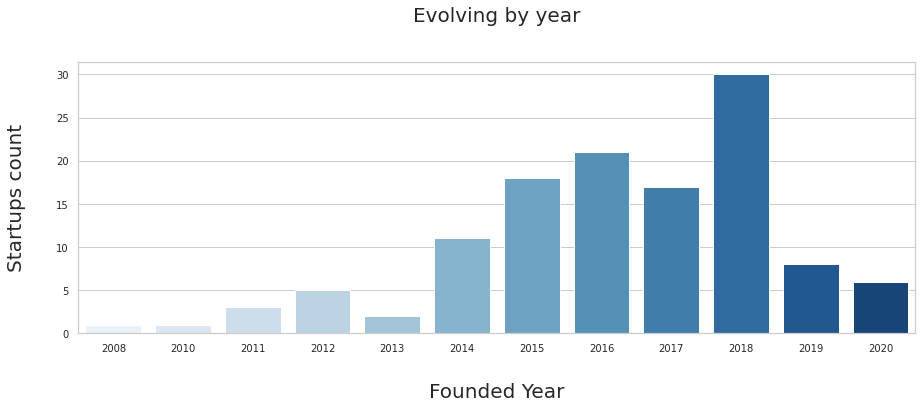

In [ ]:
# New startups per year
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.axes.set_title("Evolving by year",fontsize=20,pad=40)
ax = sns.countplot(x='Founded Year', data=companies, order= companies['Founded Year'].value_counts().index.sort_values(), palette="Blues")
ax.set_xlabel('Founded Year', fontsize=20, labelpad=30)
ax.set_ylabel('Startups count', fontsize=20, labelpad=30)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

### Online Presence

We want to know if:
- the startup has a website or not.
- the social networks profile existence.

In [ ]:
companies['Website'].describe()

count                 123
unique                 62
top       rideairlift.com
freq                   17
Name: Website, dtype: object

In [ ]:
companies['Website'] = companies['Website'].apply(lambda x: int(x != "" or not pd.isnull(x)))

In [ ]:
companies['Website'].unique()

array([1])

All starups in the dataset have websites. They can be useful for scraping in other tasks.

In [ ]:
# Social Media channels presence
def socialMedia(network):
  network = str(network).lower()
  social_count = 0
  if 'facebook' in network:
    social_count +=1
  if 'twitter' in network:
    social_count +=3
  if 'linkedin' in network:
    social_count +=5
  return social_count

companies["Social media"] = companies["Social media URLs"].apply(lambda x: socialMedia(x))

In [ ]:
companies["Social media"].unique()

array([4, 9, 1, 5, 6, 0, 3])

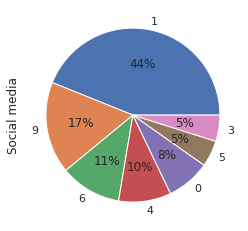

In [ ]:
companies["Social media"].value_counts().plot.pie(autopct='%1.0f%%')


44% of the startups have only facebook page whereas 17% are present on all social platforms. <br/> Only 8% have no presence on any social network.

### Location

In [ ]:
companies["Location"].unique()

array(['Islamabad', 'Lahore', 'Karachi', 'Lahore, Punjab, Pakistan',
       'Karachi, Sindh, Pakistan', 'Islamabad, Islamabad, Pakistan',
       'Gujrat, Punjab, Pakistan',
       'Pakistan Kili, North-West Frontier, Pakistan',
       'Lahore, Punjab,Pakistan', 'Islamabad, Pakistan', 'Lahore,',
       'Karachi,', 'Lahore, Pakistan', 'Islamabad,Pakistan',
       'Karachi,Pakistan'], dtype=object)

In [ ]:
companies["Location"] = companies["Location"].apply(lambda x: x.split(',')[0] if ',' in x else x)

In [ ]:
companies["Location"].unique()

array(['Islamabad', 'Lahore', 'Karachi', 'Gujrat', 'Pakistan Kili'],
      dtype=object)

In [ ]:
companies.HQ.unique()

array(['Asia-Pacific', 'Asia-Pacific (APAC)', 'APAC'], dtype=object)

HQ information in this case is redundant because we're focusing on the same country.

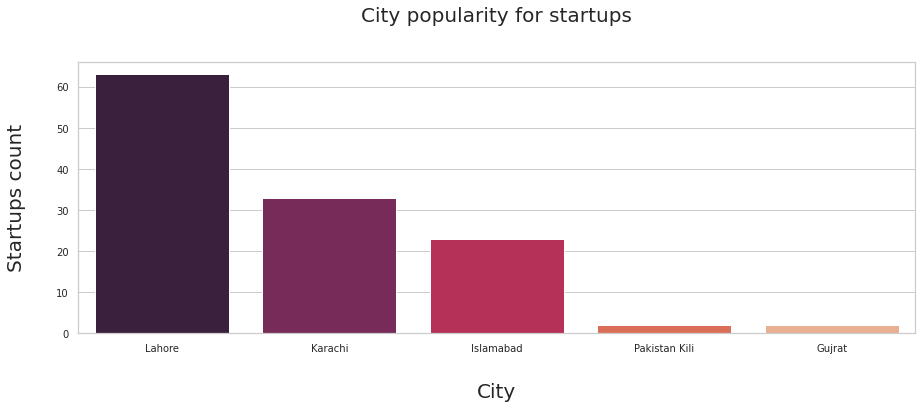

In [ ]:
# Display startups count concentration by city
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.axes.set_title("City popularity for startups",fontsize=20,pad=40)
ax = sns.countplot(x='Location', data=companies, order=companies['Location'].value_counts().index, palette="rocket")
ax.set_xlabel('City', fontsize=20, labelpad=30)
ax.set_ylabel('Startups count', fontsize=20, labelpad=30)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

### Activity Status

In [ ]:
companies['Active (opinion by CMs)'].isnull().sum() * 100 / len(companies['Active (opinion by CMs)'])

47.15447154471545

47% of the startups have unknown activity status which is the value that we want to predict in the future (A successful startup survives, hence active). Since 'Operating status' has no missing data we drop 'Active (opinion by CMS)'

In [ ]:
companies['Operating status'].isnull().sum() * 100 / len(companies['Operating status'])

0.0

In [ ]:
companies['Operating status'].describe()

count        123
unique         1
top       Active
freq         123
Name: Operating status, dtype: object

This portion of the dataset has only active startups which may influence the model later if proceeded with this data because there are no information on failed startups. In other meaning, there is no other way to punish the model of it predicts a startup to be successful then it fails in real life.

### Funding status

In [ ]:
companies['Funding status'].unique()

array(['Early Stage Venture', 'Seed', 'Pre-seed', 'Angel', 'Pre-Seed',
       'Early Stage'], dtype=object)

In [ ]:
def fundStatus(myfund):
  if myfund.lower() == 'pre-seed' :
    return '0-Pre-seed'
  elif myfund == 'Seed':
    return '1-Seed'
  elif myfund == 'Angel':
    return '2-Angel'
  else:
    return '3-Early Stage'

companies['Funding status'] = companies['Funding status'].apply(lambda x: fundStatus(x))

In [ ]:
companies['Funding status'].mode()

0    1-Seed
dtype: object

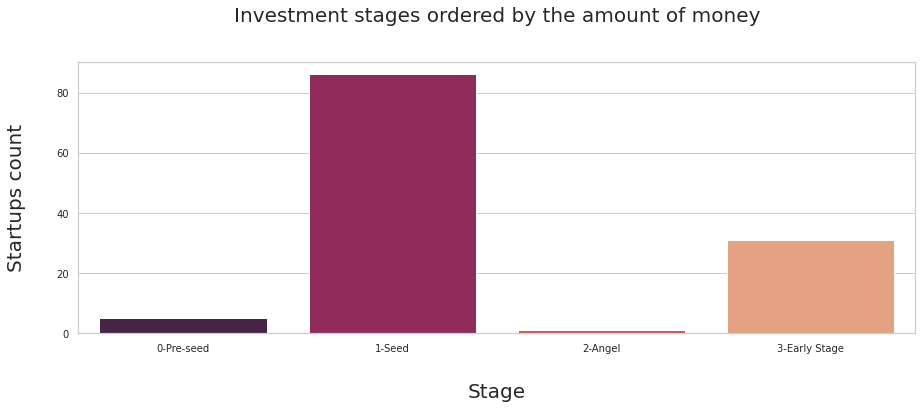

In [ ]:
# Display startups count concentration by city
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.axes.set_title("Investment stages ordered by the amount of money",fontsize=20,pad=40)
ax = sns.countplot(x='Funding status', data=companies, order=companies['Funding status'].value_counts().index.sort_values(), palette="rocket")
ax.set_xlabel('Stage', fontsize=20, labelpad=30)
ax.set_ylabel('Startups count', fontsize=20, labelpad=30)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

### Employees

In [ ]:
companies['Employees'].unique()

array(['1 to10', '1 to 10', '11 to 50', '101 to 250', '-', '10 to 50',
       nan, '501 to 1000'], dtype=object)

In [ ]:
# We remove the duplicate info and assign the min nbr in each category
def employees(employee):
  employee = str(employee)
  if employee == '-' or employee == 'nan':
    return '10' # Mode
  elif employee[-2:] == '10':
    return '1'
  elif employee == '11 to 50' or employee == '10 to 50':
    return '10'
  elif employee == '101 to 250':
    return '100'
  else:
    return '500'
  
companies['Employees'] = companies['Employees'].apply(lambda x: employees(x))

In [ ]:
companies['Employees'].mode()

0    10
dtype: object

In [ ]:
companies['Employees'].unique()

array(['1', '10', '100', '500'], dtype=object)

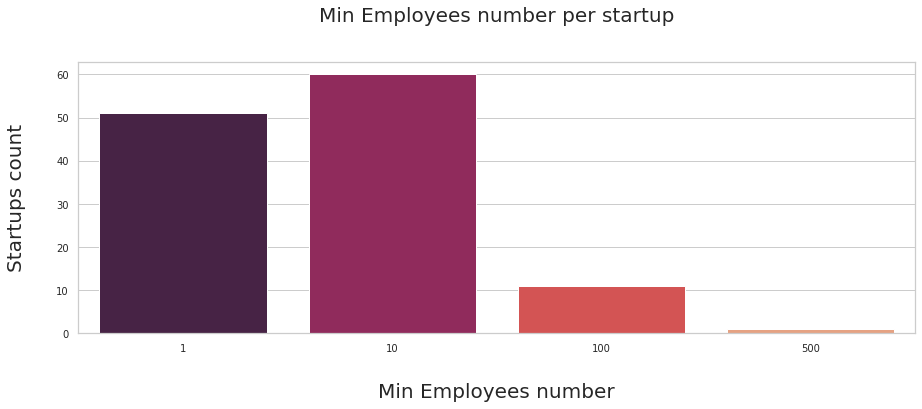

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.axes.set_title("Min Employees number per startup",fontsize=20,pad=40)
ax = sns.countplot(x='Employees', data=companies, order=companies['Employees'].value_counts().index.sort_values(), palette="rocket")
ax.set_xlabel('Min Employees number', fontsize=20, labelpad=30)
ax.set_ylabel('Startups count', fontsize=20, labelpad=30)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

Most startups have between 10 to 50 employees.

### Industry

In [ ]:
companies['Industry'].unique()

array(['Information Technology', 'Retail', 'Fashion', 'Banking',
       'Logistics', 'Financial Services', 'Marketplace', 'Transportation',
       'Services', 'Health Care', 'Automotive', 'IT', 'B2B',
       'working community', 'Workspace', 'Management', 'Education',
       'Mobile', 'Beauty fitness', 'Transportaion', 'Travel',
       'Local Advertising', 'health Care', 'Technology',
       'Media And Entertainment', 'Digital Entertainment'], dtype=object)

In [ ]:
def getIndustry(industry):
  if industry == 'Information Technology' or industry == 'Technology':
    return 'IT'
  elif any(indus in industry for indus in ['Media And Entertainment', 'Digital Entertainment']):
    return 'Entertainment'
  elif industry == 'Transportaion':
     return 'Transportation'
  return industry
  
companies['Employees'] = companies['Employees'].apply(lambda x: employees(x))

In [ ]:
companies['Horizontal_x'].unique()

array(['-', 'Analytics, ,Artificial Intelligence', nan,
       'Mobile Payments, Software', 'Lifestyle', 'Real Estate',
       'Information Services', 'Social Media Marketing, Brand Marketing',
       'Content Creators, Photography',
       'Mobile Device, Mobile Apps, Personal Health', 'Mobile App',
       'Information Services, Information Technology',
       'Ride sharing, Courier service, local shopping',
       'E-commerce,CRM,Enterprise software, ios, web development, software',
       'B2B,E-commerce', 'Co-working', 'Information Technology, Database',
       'Banking, Financial services', 'Web development, Mobile App',
       'App, Online', 'Artificial Intelligence', 'E-commerce',
       'Automotive, Classified', 'Mobile devices', 'SaaS', 'Retail',
       'Wellness', 'Information Technology', 'E- commerce', 'Big Data',
       'Internet', 'Ecommerce', 'Content, Video production',
       'Sharing economy', 'Ecommerce , online Delivery',
       'Marketplace, Automotive', 'Music Str

In [ ]:
def getIndustry_x(industry):
  industry = str(industry)
  if industry == '-' or industry == 'nan':
    return 'Mobile App'
  elif 'Artificial Intelligence' in industry:
    return 'AI'
  elif 'Bank' in industry or 'Payment' in industry:
    return 'Finance'
  elif any(indus in industry for indus in ['Health','Wellness', 'Lifestyle']):
    return 'Wellness'
  elif 'Web' in industry or 'SaaS' in industry:
    return 'Web App'
  elif 'Delivery' in industry or 'Courier' in industry:
    return 'Delivery'
  elif 'commerce' in industry:
    return 'E-commerce'
  elif any(indus in industry for indus in ['Internet', 'Information Services', 'Information Technology']):
    return 'IT'
  elif 'Mobile' in industry or 'App':
    return 'Mobile App'
  elif 'Content' in industry:
    return 'Content(Photo/Video)'
  elif 'Automotive' in industry:
    return 'Automative'  
  elif 'Marketing' in industry:
    return 'Marketing'
  else:
    return industry
  
companies['Horizontal_x'] = companies['Horizontal_x'].apply(lambda x: getIndustry_x(x))

In [ ]:
companies['Horizontal_x'].unique()

array(['Mobile App', 'AI', 'Finance', 'Wellness', 'IT', 'Delivery',
       'E-commerce', 'Web App'], dtype=object)

In [ ]:
companies['Horizontal_x'].mode()

0    Mobile App
dtype: object

In [ ]:
companies['Horizontal_y'].unique()

array(['News/Media', 'Lifestyle', nan, 'Fintech', 'Real Estate',
       'Customer Service', 'Security', 'Marketing/CRM', 'Ride sharing',
       'Training', 'E-Commerce', 'Education', 'Technology', 'Services',
       'Health Care', 'B2B', 'Web Development', 'Artificial Intelligence',
       'Classifieds', 'Telehealth', 'Tickets', 'Fashion', 'CRM',
       'Marketing', 'Digital Entertainment', 'Food Delivery', 'Music'],
      dtype=object)

In [ ]:
companies['Horizontal_y'].mode()

0    Technology
dtype: object

In [ ]:
companies['Horizontal_y'].fillna(companies['Horizontal_y'].mode(), inplace=True)

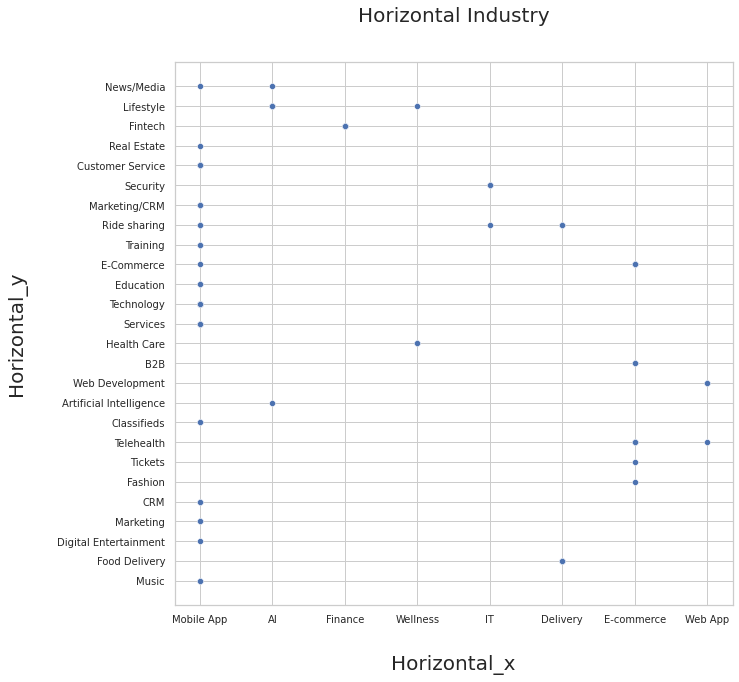

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.axes.set_title("Horizontal Industry",fontsize=20,pad=40)
ax = sns.scatterplot(data=companies, x='Horizontal_x', y='Horizontal_y')
ax.set_xlabel('Horizontal_x', fontsize=20, labelpad=30)
ax.set_ylabel('Horizontal_y', fontsize=20, labelpad=30)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

### Investors

In [ ]:
# companies['Founder round 1 investors']
# companies['Founder round 2 investors']
# companies['Founder round 3 investors']
# companies['Founder round 4 investors']
# companies['Founder round 5 investors']

len(companies['Investor/VC Fund'].unique())

80

80 different investors.

In [ ]:
companies[companies['Investor/VC Fund'] == 'Self-Funding']

,Startup,Active (opinion by CMs),Last edited by,Location,HQ,Founded date,Industry (Vertical),Horizontal_x,Operating status,Funding status,Employees,Founder 1,Founder 2,Founder 3,Founder 4,Founder 5,Unnamed: 16,Website,Social media URLs,Email,Phone,Funding round 1 (Investment),Founder round 1 investors,Funding round 1 date,Funding round 2 (Investment),Founder round 2 investors,Funding round 2 date,Funding round 3 (Investment),Founder round 3 investors,Funding round 3 date,Funding round 4 (Investment),Founder round 4 investors,Funding round 4 date,Funding round 5 (Investment),Founder round 5 investors,Funding round 5 date,Investor/VC Fund,Industry,Horizontal_y,Total Round Amount,Lead Investor (Yes/No),Funding Round,Date,Founded Year,Social media
105,devcontact,NaN,-,Lahore,Asia-Pacific (APAC),2014-10-01 00:00:00,NaN,Mobile App,Active,1-Seed,1,-,-,-,-,-,NaN,1,NaN,NaN,401-555-1395,$100K,NaN,2014-11-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Self-Funding,Information Technology,CRM,100000,No,Seed,2014-11-17,2014,0


We checked if it's common to save its own money (Love money (from Family&Friends, Personal Savings)) but there is only 1 record. 

### Founders

In [ ]:
# companies['Founder 1']
# companies['Founder 2']
# companies['Founder 3']
# companies['Founder 4']
# companies['Founder 5']

From this dataset, we can notice redundant names which is known as Serial Entrepreneurs. 
Founders are an important factor, 
usually investors interview them personaly.
but is only their name presence is important? 
Should we get more information abt founders, like how many years of experience, successful/failed startups, expertise field..

## Cleaning

In [ ]:
# useless columns?
companies.drop(['Unnamed: 16', 'Email', 'Phone', 'HQ', 'Social media URLs', 'Last edited by', 'Founded date', 'Date', 'Active (opinion by CMs)'], axis=1,  inplace = True)